<a href="https://colab.research.google.com/github/sdinesh01/news-deserts-visualization/blob/main/WafflePlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 20.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns
from plotnine import *

## preprocess

In [6]:
from xlrd.book import sheet
# for graph on 
pub_data_20 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA340/assignments/Final/UNCNewspaperDatabase_12_17_20.xlsx', sheet_name='UNC 2020 Newspapers')
pub_data_16 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA340/assignments/Final/UNCNewspaperDatabase_12_17_20.xlsx', sheet_name='UNC 2016 Newspapers')
pub_data_14 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA340/assignments/Final/UNCNewspaperDatabase_12_17_20.xlsx', sheet_name='UNC 2014 Newspapers')
pub_data_04 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA340/assignments/Final/UNCNewspaperDatabase_12_17_20.xlsx', sheet_name='UNC 2004 Newspapers')

In [7]:
# subset rows where owner_type in 2020 is not NaN
pub_20_owner = pub_data_20[~pub_data_20['owner_type'].isna()]
pub_20_owner['year'] = '2020'
pub_20_owner.owner_type.value_counts()
#pub_20_owner.count()

<ipython-input-7-c6bccef7479a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Private        2365
Investment      800
Public          368
Independent       2
Name: owner_type, dtype: int64

In [8]:
# subset rows where owner_type in 2016 is not NaN
pub_16_owner = pub_data_16[~pub_data_16['owner_type'].isna()]
pub_16_owner['year'] = '2016'
pub_16_owner.owner_type.value_counts()

<ipython-input-8-3f52a418ee2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Private        1039
Investment     1030
Public          436
Independent       8
Name: owner_type, dtype: int64

In [9]:
# subset rows where owner_type in 2014 is not NaN
pub_14_owner = pub_data_14[~pub_data_14['owner_type'].isna()]
pub_14_owner['year'] = '2014'
pub_14_owner.owner_type.value_counts()

<ipython-input-9-f837664d9ca8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Private        1065
Investment     1031
Public          400
Independent      33
Name: owner_type, dtype: int64

In [10]:
# subset rows where owner_type in 2004 is not NaN
pub_04_owner = pub_data_04[~pub_data_04['owner_type'].isna()]
pub_04_owner['year'] = '2004'
#pub_04_owner.owner_type.value_counts()

<ipython-input-10-4ec32bf6ed65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
#create new df that combines all of the above dfs with new column for year
combined_data = pd.concat([pub_20_owner, pub_16_owner, pub_14_owner, pub_04_owner], axis=0)
combined_data

,state,newspaper_id,newspaper_name,frequency,city,county,owner_id,owner_name,owner_type,total_circulation,days_published,year
0,AK,50003,Anchorage Press,W,Anchorage,Anchorage Municipality,5813.0,Wick Communications,Private,20000.0,1,2020
1,AK,18776,The Bristol Bay Times/Dutch Harbor Fisherman,W,Anchorage,Anchorage Municipality,6028.0,Ryan Binkley & Jason Evans,Private,NaN,1,2020
2,AK,18654,The Arctic Sounder,W,Anchorage,Anchorage Municipality,6028.0,Ryan Binkley & Jason Evans,Private,2000.0,1,2020
3,AK,10092,Anchorage Daily News,D,Anchorage,Anchorage Municipality,6028.0,Ryan Binkley & Jason Evans,Private,33301.0,7,2020
4,AK,18943,The Cordova Times,W,Cordova,Valdez-Cordova,6045.0,Native Village of Eyak,Private,969.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
8925,NH,56274,Hippo,W,Manchester,Hillsborough,4629.0,"Reese, Jody",Private,NaN,NaN,2004
8926,NH,90506,Laconia Daily Sun The,D,Laconia,Belknap,6155.0,"Lakes Region News Club, Inc",Private,NaN,NaN,2004
8927,NH,56271,Londonderry Times,W,Londonderry,Rockingham,4199.0,Nutfield Publishing LLC,Private,NaN,NaN,2004
8928,NH,56272,Nutfield News,W,Londonderry,Rockingham,4199.0,Nutfield Publishing LLC,Private,NaN,NaN,2004


In [12]:
## For each year, create a new DF with the counts of each owner type

# 2020
z = pd.DataFrame(pub_20_owner.owner_type.value_counts())
z['owner_type'].sum()
# 2016
y = pd.DataFrame(pub_16_owner.owner_type.value_counts())
y['owner_type'].sum()
# 2014
x = pd.DataFrame(pub_14_owner.owner_type.value_counts())
x['owner_type'].sum()
# 2004
w = pd.DataFrame(pub_04_owner.owner_type.value_counts())
w['owner_type'].sum()


2275

In [13]:
## For each DF created above, calculate the percentage of each owner type
# create new col with the percentage and a new col for the year

pct = []
for idx,g in enumerate(z):
  pct = (z['owner_type']/z['owner_type'].sum())*100
  pct.append(pct)
z['pct'] = pct
z['year'] = '2020'  

pct = []
for idx,g in enumerate(y):
  pct = (y['owner_type']/y['owner_type'].sum())*100
  pct.append(pct)
y['pct'] = pct
y['year'] = '2016'  

pct = []
for idx,g in enumerate(x):
  pct = (x['owner_type']/x['owner_type'].sum())*100
  pct.append(pct)
x['pct'] = pct
x['year'] = '2014'  

pct = []
for idx,g in enumerate(z):
  pct = (w['owner_type']/w['owner_type'].sum())*100
  pct.append(pct)
w['pct'] = pct
w['year'] = '2004'  


In [14]:
# calculate the proportion of squares in a 10x10 grid for each owner type; append the proportion to the DF
total1 = sum(z['owner_type'])
proportions = [(float(value) / total1) for value in z['owner_type']]
tiles_per_category = [round((proportion * 100),ndigits=0) for proportion in proportions]
print(tiles_per_category)

z['proportions'] = tiles_per_category

[67.0, 23.0, 10.0, 0.0]


In [15]:
# calculate the proportion of squares in a 10x10 grid for each owner type; append the proportion to the DF
total2 = sum(y['owner_type'])
proportions2 = [(float(value) / total2) for value in y['owner_type']]

tiles_per_category = [round((proportion * 100),ndigits=0) for proportion in proportions2]
print(tiles_per_category)

y['proportions'] = tiles_per_category

[41.0, 41.0, 17.0, 0.0]


In [16]:
# calculate the proportion of squares in a 10x10 grid for each owner type; append the proportion to the DF
total3 = sum(x['owner_type'])
proportions3 = [(float(value) / total2) for value in x['owner_type']]
tiles_per_category = [round((proportion * 100),ndigits=0) for proportion in proportions3]
print(tiles_per_category)

x['proportions'] = tiles_per_category

[42.0, 41.0, 16.0, 1.0]


In [17]:
# calculate the proportion of squares in a 10x10 grid for each owner type; append the proportion to the DF
total3 = sum(w['owner_type'])
proportions3 = [(float(value) / total2) for value in w['owner_type']]

tiles_per_category = [round((proportion * 100),ndigits=0) for proportion in proportions3]
print(tiles_per_category)

w['proportions'] = tiles_per_category

[46.0, 27.0, 18.0, 0.0]


## Waffle plot

In [18]:
def generate_colors(color_list, number):
  ''' 
    This function randomly selects n colors from an inputted list
      Input: 
      color_list = list of hexadecimal codes to choose from
      number = number of colors to randomly select from the list
  '''
  s = set()
  while len(s)<number:
    rand_colors = [random.choice(color_list)]
    for x in rand_colors:
        if x not in s: 
          s.add(x)
  return list(s)

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


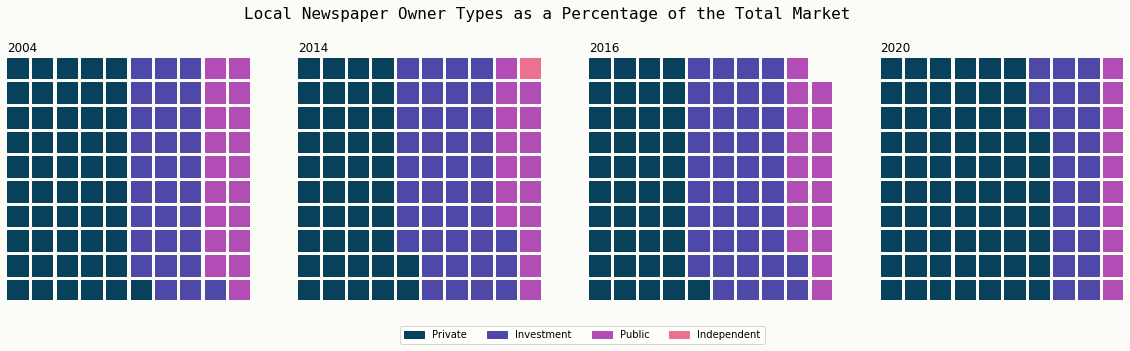

In [19]:
fig = plt.figure(
    FigureClass=Waffle, rows=10, columns=10, figsize=(20,5),
    plots = {
        142:{
            'values':list(x.proportions),
            'labels':list(x.index),
            'colors':['#07415b','#4e48a8','#b14db5','#eb718f'],
             'title': {'label': '2014', 'loc': 'left', 'fontsize': 12}
             },
        143:{'values': list(y.proportions),
            'labels': list(y.index),
             'colors':['#07415b','#4e48a8','#b14db5','#eb718f'],
             'title': {'label': '2016', 'loc': 'left', 'fontsize': 12}
             },
        144:{'values': list(z.proportions),
            'labels': list(z.index),
             'colors':['#07415b','#4e48a8','#b14db5','#eb718f'],
             'legend':{'bbox_to_anchor': (-2,-0.2),'loc': 'lower left','ncol': len(z.index)
                       },
             'title': {'label': '2020', 'loc': 'left', 'fontsize': 12}
             },
        141:{'values': list(w.proportions),
            'labels': list(w.index),
            'colors':['#07415b','#4e48a8','#b14db5','#eb718f'],
             'title': {'label': '2004', 'loc': 'left', 'fontsize': 12}
             },

    },
)

fig.axes[0].get_legend().remove()
fig.axes[1].get_legend().remove()
#fig.axes[2].get_legend().remove()
fig.axes[3].get_legend().remove()
plt.rcParams["font.family"] = "monospace"
fig.set_facecolor('#fbfbf8')
fig.suptitle('Local Newspaper Owner Types as a Percentage of the Total Market', fontsize=16)

fig.show()